## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Import all libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
%matplotlib inline 

In [2]:
#Read the dataset
student_df = pd.read_csv('Student_Data-1.csv', ';')

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [3]:
#Setting index name of the dataframe to "number"
student_df.rename_axis('number', inplace=True)

#Checking column-wise if there are any missing values
student_df[student_df.isnull()].count()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [4]:
#Print all attributes which are not numerical
student_df.select_dtypes(exclude=np.number)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [5]:
#Finding variane of each numerical independent variable
v = student_df.iloc[:,:-1].var()
v

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
dtype: float64

In [6]:
#Looping through variance of each numeric column & dropping columns where variance < 1
for i in v.index:
    if v[i] < 1:
        student_df.drop(i, axis=1, inplace=True)
        
#print the final dataset
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [7]:
#Initialize LabelEncoder
le = preprocessing.LabelEncoder()

#Iterate through all categorical columns & convert them into numerical values
for i in student_df.select_dtypes(exclude=np.number).columns:
    student_df[i] = le.fit_transform(student_df[i])

#Check the values
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [8]:
#Encoding G1, G2 & G3 columns into binary values with 0 if < 10 else 1
student_df['G1'] = student_df['G1'] >= 10
student_df['G2'] = student_df['G2'] >= 10
student_df['G3'] = student_df['G3'] >= 10

#Check the values
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,False,False,False
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,False,False,False
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,False,False,True
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,True,True,True
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,False,True,True


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [9]:
#Seperating Featurs & Target
X = student_df.iloc[:,:-1]
y = student_df.iloc[:,-1]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

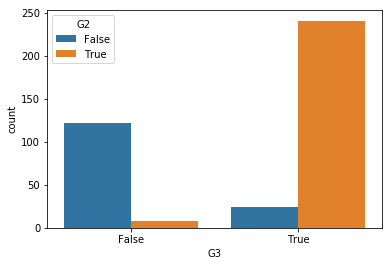

In [10]:
#Plotting countplot for G3 with G2 as hue
sns.countplot(student_df['G3'], hue=student_df['G2'])

### Inference:
The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

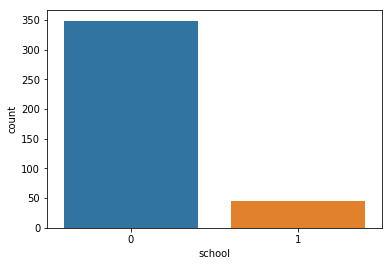

In [11]:
#Countplot for Students in each school
sns.countplot(student_df['school'])

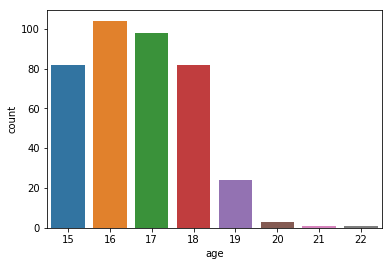

In [12]:
#Countplot for Students with different ages
sns.countplot(student_df['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [13]:
#Splitting data into training and test sets with training size of 300 records
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(y.size - 300)/y.size, random_state=1)

#Printing number of records in training set & test set
print("Number of train records = ", y_train.size, "\nNumber of test records = ", y_test.size)

Number of train records =  300 
Number of test records =  95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [14]:
#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.9333333333333333
Accuracy of the Logisitic Regression model on Testing data is 0.9052631578947369
Classification Report for Training data is:
              precision    recall  f1-score   support

      False       0.87      0.94      0.91       102
       True       0.97      0.93      0.95       198

avg / total       0.94      0.93      0.93       300

Classification Report for Testing data is:
              precision    recall  f1-score   support

      False       0.81      0.89      0.85        28
       True       0.95      0.91      0.93        67

avg / total       0.91      0.91      0.91        95



# Naive bayes with Iris data

### Import Iris.csv

In [15]:
#Load Iris.csv
iris_df = pd.read_csv('iris.csv', index_col='Id')

#Printing top 5 rows
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#Dropping missing values with setting threshold of at least 3 not null values
iris_df.dropna(thresh=3, inplace=True)

In [17]:
#Checking if there are any further missing values
iris_df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [18]:
#Slice data set for Independent variables and dependent variables
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

### Find the distribution of target variable (Class)

In [19]:
#Distribution of target variable
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

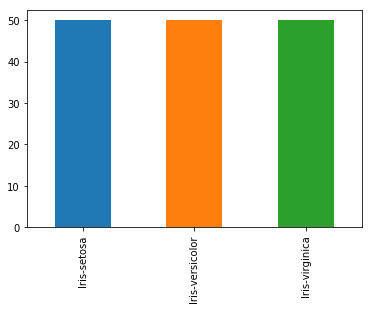

In [20]:
#Plotting the distribution of target variable
y.value_counts().plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


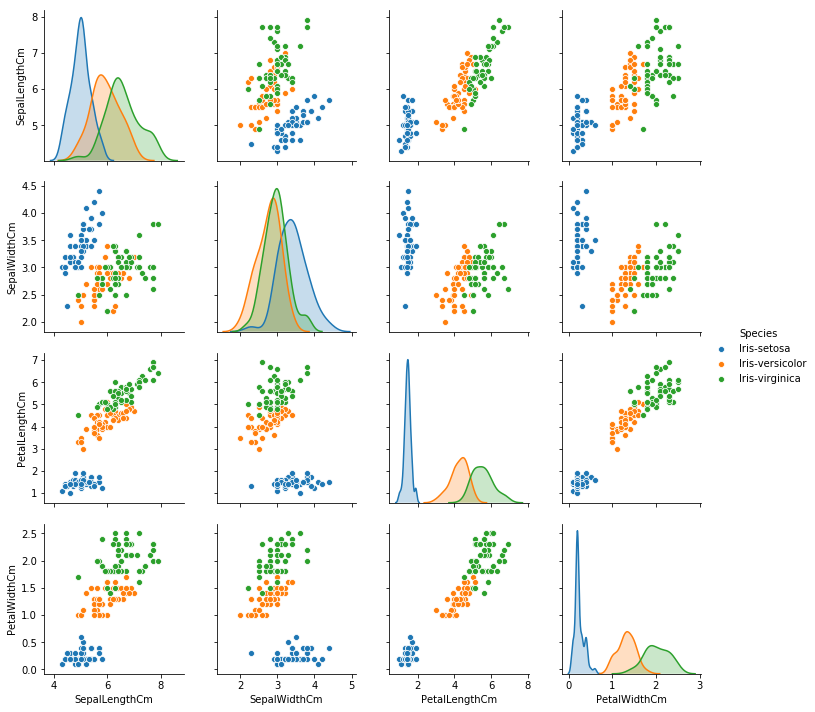

In [21]:
sns.pairplot(iris_df, hue='Species')

### Inference:
PetalLength & PetalWidthCm are very clearly marking Iris-setosa apart from other 2 species as Iris-setosa species flowers have small petals.

PetalWidthCm is also helpful in distinguishing between Iris-versicolor & Iris-virginica species greatly with Iris-virginica having wider petals than Iris-versicolor having little overlap between the 2.

Overall distribution of each column is somewhat Normal distribution which is pre-requisite for using Naive-Bayes model but there is some positive correlation between SepalLengthCm vs PetalLengthCm, SepalLengthCm vs PetalWidthCm and high positive correlation between PetalLengthCm vs PetalWidthCm which may deteriorate the Naive-Bayes model's performance as it assumes independence among the features.

### Summary Statistics and explain insights for at least 2 variables

In [22]:
#Summary statistics
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Insights:
SepalLengthCm is having more or less symmetric distribution with very less difference between mean & median with mean slightly > median but it may be due to somewhat long tail on the right as compares to left tail

PetalLengthCm is having left skew as Mean < Median. Left tail isn't long but there is high skew in the 2nd quartile.

### Correlation among all variables and give your insights

In [23]:
#Correlation
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Insights:
As seen from pairplot above, there is very high positive correlation between PetalLengthCm & PetalWidthCm and also high positive correlation between SepalLengthCm & PetalLengthCm and between SepalLengthCm & PetalWidthCm.

There is slight negative correlation between SepalWidthCm & PetalLengthCm and between SepalWidthCm & PetalWidthCm.

So, there is slight correlation among each & every columns & Naive-Bayes model may deteriorate Accuracy in this case as it assumes Independence among Features. But since there are features that distinguish the Species quite-well, Performance might not be so bad.

### Split data in Training and Validation in 80:20

In [24]:
#Splitting data into training and test sets in ration 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Do Feature Scaling

In [25]:
#Applying zsore to do Feature scaling
X_train = zscore(X_train)
X_test = zscore(X_test)

### Train and Fit NaiveBayes Model

In [26]:
#Initialize GuassianNB
nb_model = GaussianNB()

In [27]:
#Fitting model on training dataset
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [28]:
#Accuracy
nb_model.score(X_test, y_test)

0.9

In [29]:
#Predict y for testing dataset
y_predict = nb_model.predict(X_test)

#Confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


## Conclusion:
Though we saw that there is high colinearity among features which is against the pre-requisites of Naive-Bayes model, it seems that the Model is giving high accuracy due to the fact that there are some features which seperate out each Species quite well.